# Solution curve of Van der Pol's Equation for a range of parameter

- radau method

In [1]:
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [35]:
# def VanDerPols(t, y, epsilon):
#     yp = np.ones_like(y)
#     yp[0] = y[1]
#     yp[1] = ((1-y[0]**2)*y[1] - y[0])/epsilon
#     return yp

# def VanDerPols(t, y, mu):
#     yp = np.ones_like(y)
#     yp[0] = y[1]
#     yp[1] = mu*(1-y[0]**2)*y[1] - y[0]
#     return yp

# def VanDerPols(t, y, mu):
#     yp = np.ones_like(y)
#     yp[0] = -mu*y[0] + 0.9*y[1]**2
#     yp[1] = y[0] - 0.9*y[1]**2 + 1
#     return yp

def VanDerPols(t, y, mu):
    yp = np.ones_like(y)
    yp[0] = 0.9*mu*y[1]**3 - y[0] 
    yp[1] = y[0] - mu*y[1]
    return yp

def VanDerPols(t, y, mu):
    yp = np.ones_like(y)
    yp[0] = y[1]
    yp[1] = -0.1*mu*(y[1]**2-y[0]**2) - mu*y[1]
    return yp
#VanDerPols(0, [0, 1], 3)

100%|██████████| 9/9 [00:00<00:00, 31.63it/s]


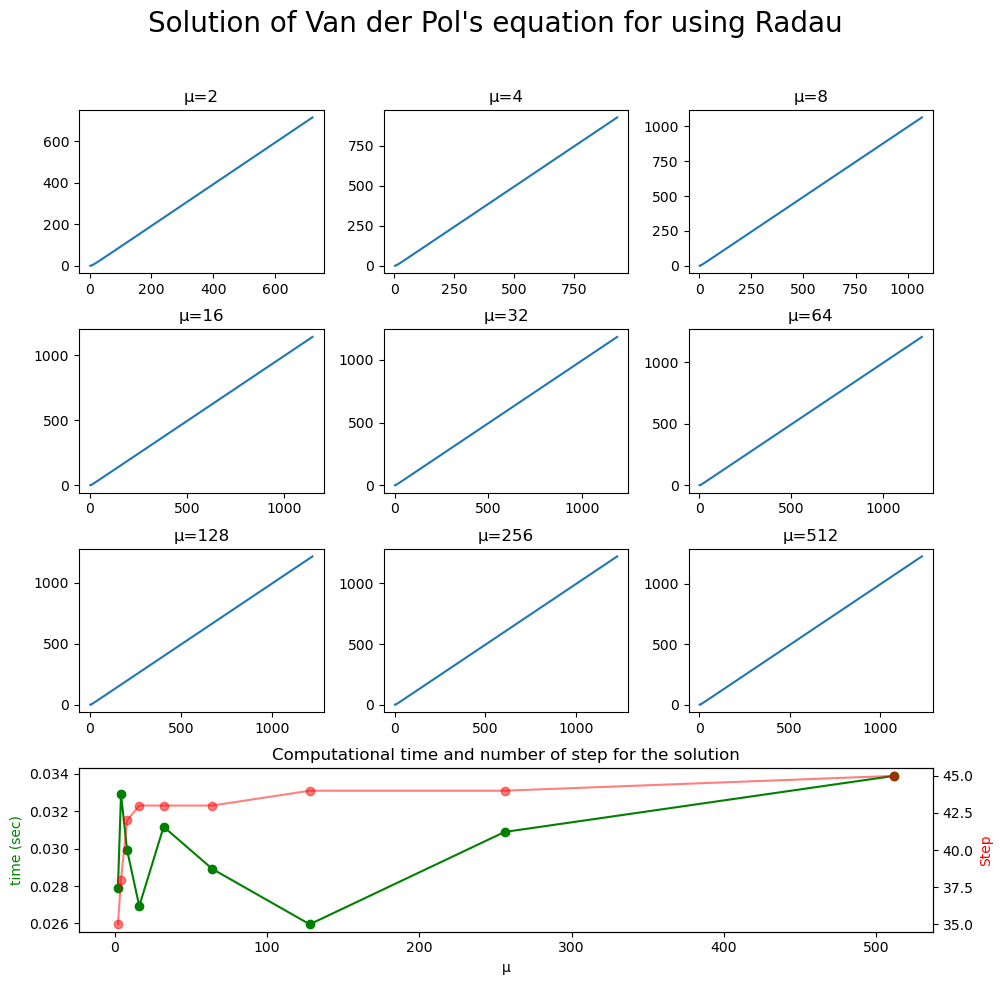

In [36]:
import matplotlib.gridspec as gridspec
mu_list = [2, 4, 8, 16, 32, 64, 128, 256, 512]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, mu in tqdm(enumerate(mu_list), total=len(mu_list)):
    
    equation = scipy.integrate.Radau(lambda t, y: VanDerPols(t, y, mu=mu),
                                 t0 = 0,
                                 y0 = [2, 1],
                                 t_bound = 10,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(y1_final, y2_final)
    ax[i//3, i%3].set_title(f"μ={mu}")

ax_all.plot(mu_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(mu_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("\alpha")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of Van der Pol's equation for using Radau", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

100%|██████████| 9/9 [00:11<00:00,  1.25s/it]


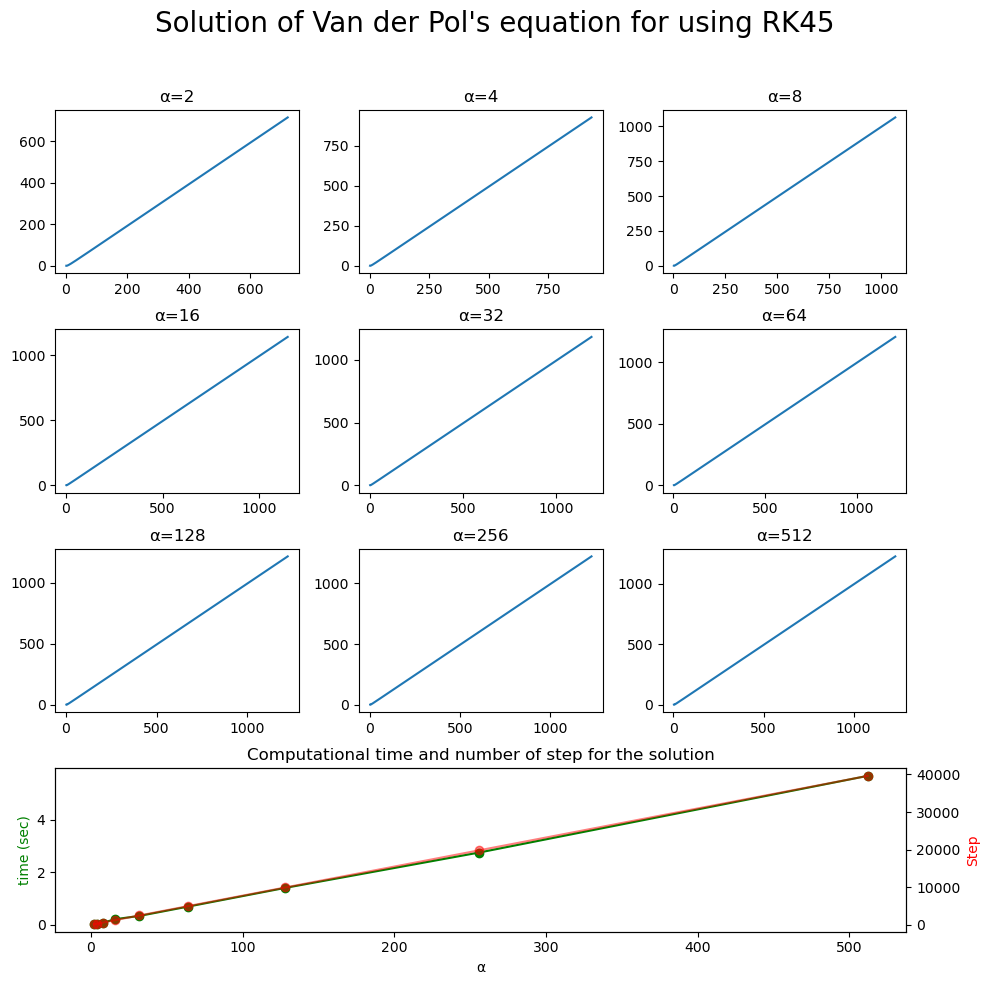

In [37]:
import matplotlib.gridspec as gridspec
#mu_list = [1, 2, 3, 4, 5, 6, 7, 8, 500]
mu_list = [2, 4, 8, 16, 32, 64, 128, 256, 512]
#mu_list = [2, 4, 6, 8, 10, 12, 16, 18, 20]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, mu in tqdm(enumerate(mu_list), total=len(mu_list)):
    
    equation = scipy.integrate.RK45(lambda t, y: VanDerPols(t, y, mu=mu),
                                 t0 = 0,
                                 y0 = [2, 1],
                                 t_bound = 10,
                                 rtol=0.000001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(y1_final, y2_final)
    ax[i//3, i%3].set_title(f"α={mu}")

ax_all.plot(mu_list, computational_time, 'g-o')
ax_all.set_xlabel("α")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(mu_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("α")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of Van der Pol's equation for using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

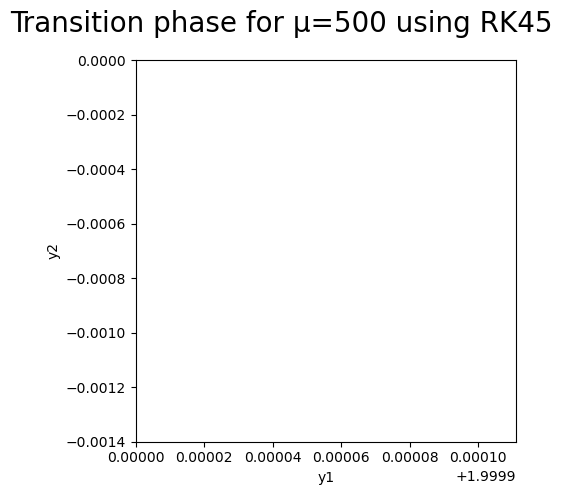

In [18]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(y1_final, y2_final, "-o", markersize=4)

ax.set_xlabel("y1")
ax.set_ylabel("y2")
ax.set_xlim([1.9999, 2.00001111])
ax.set_ylim([-0.0014, 0])

fig.suptitle(f"Transition phase for μ={500} using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)